In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import numpy as np
import time
now = time.strftime('%d%m%Y%H%M%S')

In [56]:
#import raw csv from jhu github
jhu_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [57]:
# extract 'country/region' column
jhu_data_cr = jhu_data['Country/Region']
#drop columns
df_jhu_data = jhu_data.drop(['Lat', 'Long', 'Country/Region'], axis=1)
#insert 'country/region' in pos[0]
df_jhu_data.insert(0, 'Country/Region', jhu_data_cr)

In [58]:
# slice canada data from jhu df and capture snapshot to csv
df_canada = df_jhu_data[df_cor['Country/Region'] == 'Canada']
df_canada.to_csv('df_canada'+now+'.csv')

In [59]:
### Melt the dateframe into the right shape and set index
# from Mohammad Ashhad blog on towardsdatascience
# https://towardsdatascience.com/analyzing-coronavirus-covid-19-data-using-pandas-and-plotly-2e34fe2c4edc

def cleandata(df_raw):

    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region'],value_name='Cases',var_name='Date')

    df_cleaned=df_cleaned.set_index(['Date'])

    return df_cleaned 

In [60]:
# create df to slice of provincial numbers
df_can = cleandata(df_canada)

In [61]:
# create dfs by province
df_on = df_can[df_can['Province/State'] == 'Ontario']
df_bc = df_can[df_can['Province/State'] == 'British Columbia']
df_ab = df_can[df_can['Province/State'] == 'Alberta']
df_qc = df_can[df_can['Province/State'] == 'Quebec']
df_mb = df_can[df_can['Province/State'] == 'Manitoba']
df_sk = df_can[df_can['Province/State'] == 'Saskatchewan']
df_nb = df_can[df_can['Province/State'] == 'New Brunswick']
df_gp = df_can[df_can['Province/State'] == 'Grand Princess']
df_pe = df_can[df_can['Province/State'] == 'Prince Edward Island']
df_ns = df_can[df_can['Province/State'] == 'Nova Scotia']
df_nf = df_can[df_can['Province/State'] == 'Newfoundland and Labrador']

In [62]:
# capture snapshot of df_can
df_can.to_csv('df_can'+now+'.csv')
print(np.unique(df_can['Province/State'].values))
print(df_can['Province/State'].value_counts())

['Alberta' 'British Columbia' 'Grand Princess' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Northwest Territories' 'Nova Scotia'
 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan']
British Columbia             60
Northwest Territories        60
New Brunswick                60
Manitoba                     60
Prince Edward Island         60
Quebec                       60
Newfoundland and Labrador    60
Ontario                      60
Nova Scotia                  60
Alberta                      60
Saskatchewan                 60
Grand Princess               60
Name: Province/State, dtype: int64


In [63]:
# from Mohammad Ashhad blog on towardsdatascience
# https://towardsdatascience.com/analyzing-coronavirus-covid-19-data-using-pandas-and-plotly-2e34fe2c4edc

def countrydata(df_cleaned,oldname,newname):

    df_country=df_cleaned.groupby(['Country/Region','Date'])['Cases'].sum().reset_index()

    df_country=df_country.set_index(['Date'])

    df_country.index= pd.to_datetime(df_country.index)

    df_country=df_country.sort_values(['Country/Region','Date'],ascending=True)

    df_country=df_country.rename(columns={oldname:newname})

    return df_country


### Get DailyData from Cumulative sum

def dailydata(dfcountry,oldname,newname):

   #dfcountrydaily=dfcountry.groupby(level=0).diff().fillna(0)

    dfcountrydaily=dfcountry.rename(columns={oldname:newname})

    return dfcountrydaily

In [64]:
# clean and align
df_can_data = countrydata(df_can, 'Cases', 'Total Cases')
df_can_tot = dailydata(df_can_data, 'Total Cases', 'Daily Total Cases')
df_can_tot['Daily New Cases'] = df_can_tot['Daily Total Cases'].diff().fillna(0)
df_cdn = df_can_tot.drop(['Country/Region', 'Daily New Cases'], axis=1)
df_cdn.head()

,Daily Total Cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1


In [65]:
# subset for provincial data
df_cdn_prov = df_cdn

In [66]:
# make first row header row and drop first row
df_cdn_prov.columns = df_cdn_prov.iloc[0]
df_cdn_prov = df_cdn.drop(df_cdn.head(1).index)
df_cdn_prov.head()
df_cdn_prov.columns

Int64Index([0], dtype='int64', name=2020-01-22 00:00:00)

In [67]:
# rename axis, drop first set of rows with no counts and capture snapshot to csv
#df_cdn_prov = df_cdn_prov.rename_axis("Date", axis="columns")

df_cdn_prov = df_cdn.drop(df_cdn.head(5).index)
df_cdn_prov.to_csv('df_cdn_prov'+now+'.csv')

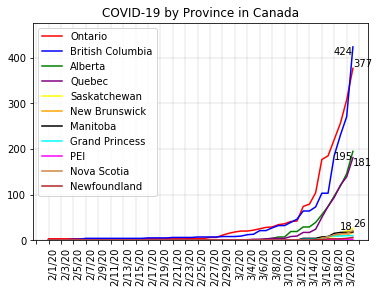

In [68]:
#plot all provincial locations, from February 2020
dates = df_on.index.values[10:]
on_counts = df_on['Cases'][10:]
bc_counts = df_bc['Cases'][10:]
ab_counts = df_ab['Cases'][10:]
qc_counts = df_qc['Cases'][10:]
mb_counts = df_mb['Cases'][10:]
sk_counts = df_sk['Cases'][10:]
nb_counts = df_nb['Cases'][10:]
gp_counts = df_gp['Cases'][10:]
pe_counts = df_pe['Cases'][10:]
ns_counts = df_ns['Cases'][10:]
nf_counts = df_nf['Cases'][10:]

from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()
locator = MaxNLocator(nbins=30)
ax.xaxis.set_major_locator(locator)

plt.plot(on_counts, color='red', label="Ontario")
plt.plot(bc_counts, color='blue', label="British Columbia")
plt.plot(ab_counts, color='green', label="Alberta")
plt.plot(qc_counts, color='purple', label="Quebec")
plt.plot(sk_counts, color='yellow', label="Saskatchewan")
plt.plot(nb_counts, color='orange', label="New Brunswick")
plt.plot(mb_counts, color='black', label="Manitoba")
plt.plot(gp_counts, color='cyan', label="Grand Princess")
plt.plot(pe_counts, color='magenta', label="PEI")
plt.plot(ns_counts, color='peru', label="Nova Scotia")
plt.plot(nf_counts, color='firebrick', label="Newfoundland")

plt.title('COVID-19 by Province in Canada')
plt.legend(loc='upper left')
plt.xticks(rotation=90, va='top', ha='left', fontsize=10)

ax.annotate(str(on_counts[-1]),xy=(dates[-1],on_counts[-1]), horizontalalignment='left', verticalalignment='bottom')
ax.annotate(str(bc_counts[-1]),xy=(dates[-1],bc_counts[-1]), horizontalalignment='right', verticalalignment='top')
ax.annotate(str(ab_counts[-1]),xy=(dates[-1],ab_counts[-1]), horizontalalignment='right', verticalalignment='top')
ax.annotate(str(qc_counts[-1]),xy=(dates[-1],qc_counts[-1]), horizontalalignment='left', verticalalignment='top')
ax.annotate(str(mb_counts[-1]),xy=(dates[-1],mb_counts[-1]), horizontalalignment='right', verticalalignment='bottom')
ax.annotate(str(sk_counts[-1]),xy=(dates[-1],sk_counts[-1]), horizontalalignment='left', verticalalignment='bottom')
#ax.annotate(str(nb_counts[-1]),xy=(dates[-1],nb_counts[-1]), horizontalalignment='right', verticalalignment='top')
#ax.annotate(str(gp_counts[-1]),xy=(dates[-1],gp_counts[-1]), horizontalalignment='right', verticalalignment='bottom')
#ax.annotate(str(pe_counts[-1]),xy=(dates[-1],pe_counts[-1]), horizontalalignment='right', verticalalignment='bottom')
#ax.annotate(str(ns_counts[-1]),xy=(dates[-1],ns_counts[-1]), horizontalalignment='right', verticalalignment='bottom')
#ax.annotate(str(nf_counts[-1]),xy=(dates[-1],nf_counts[-1]), horizontalalignment='right', verticalalignment='bottom')

ax.grid(color='grey', linestyle='-', linewidth=0.2)
plt.ylim(0, on_counts[-1]+100)

plt.savefig('Can_Prov_cov-19'+now+'.png')
plt.show()

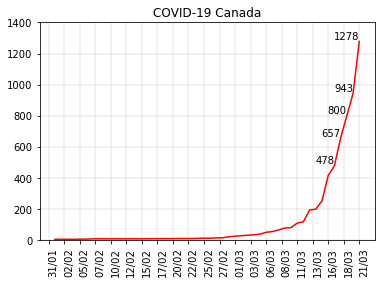

In [69]:
# canada totals line chart from February 2020
can_dates = df_can_tot.index.values[10:]
can_counts = df_can_tot['Daily Total Cases'][10:]
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=26) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(can_dates, can_counts, color='red')  # Plot some data on the axes.

ax.annotate(str(can_counts[-1]),xy=(can_dates[-1],can_counts[-1]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(can_counts[-2]),xy=(can_dates[-2],can_counts[-2]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(can_counts[-3]),xy=(can_dates[-3],can_counts[-3]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(can_counts[-4]),xy=(can_dates[-4],can_counts[-4]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(can_counts[-5]),xy=(can_dates[-5],can_counts[-5]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)

plt.ylim(0, 1400)
plt.title('COVID-19 Canada')
#plt.legend(loc='upper center')
plt.savefig('can_covid-19'+now+'.png')
plt.show()

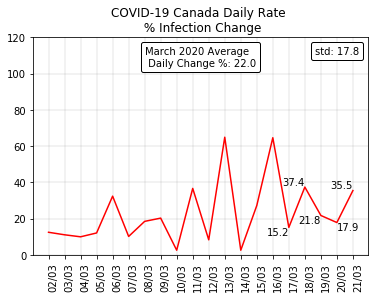

In [70]:
# Canada rate of change in infections since March 1, 2020
can_dates = df_can_tot.index.values[39:]  #[4:-1]
can_counts = df_can_tot['Daily Total Cases'][39:]  #[4:-1]
can_change = can_counts.pct_change(fill_method='ffill')*100
can_perc = round(can_change, 1)
can_perc_ave = round(can_change.sum() / len(can_change),1)
can_std = round(can_change.std(),1)
#can_per_ave = round(can_counts[-1] / len(can_dates[39:]),1)

fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=26) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(can_dates, can_change, color='red')  # Plot some data on the axes.

ax.annotate(str(can_perc[-1]),xy=(can_dates[-1],can_perc[-1]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(can_perc[-2]),xy=(can_dates[-2],can_perc[-2]), horizontalalignment='left', verticalalignment='top', clip_on=True)
ax.annotate(str(can_perc[-3]),xy=(can_dates[-3],can_perc[-3]), horizontalalignment='right', verticalalignment='top', clip_on=True)
ax.annotate(str(can_perc[-4]),xy=(can_dates[-4],can_perc[-4]), horizontalalignment='right', verticalalignment='bottom', clip_on=True)
ax.annotate(str(can_perc[-5]),xy=(can_dates[-5],can_perc[-5]), horizontalalignment='right', verticalalignment='top', clip_on=True)
from matplotlib.offsetbox import AnchoredText
at = AnchoredText('March 2020 Average \n Daily Change %: ' + str(can_perc_ave),
                  prop=dict(size=10), frameon=True,
                  loc='upper center',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('std: ' + str(can_std),
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)


plt.ylim(0, 120)
plt.title('COVID-19 Canada Daily Rate \n % Infection Change')
plt.savefig('can_covid-19_change'+now+'.png')
plt.show()